In [1]:
# Data Manupulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
#importing data from excel file parsing timestamp as dates and index, cleaning data

df = pd.read_excel('C:\\Users\Public\\Documents\\Python Scripts\\Excel files\\FW202030min.xlsx', sheetname=0, parse_dates=['Timestamp'], index_col='Timestamp')
df.dropna(inplace=True)

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2018-02-23 13:20:00 to 2018-02-16 15:30:00
Data columns (total 10 columns):
Open                 233 non-null int64
High                 233 non-null int64
Low                  233 non-null int64
Last                 233 non-null int64
VWAP                 233 non-null float64
Volume               233 non-null int64
Op Int               233 non-null float64
Vol Op Spread        233 non-null float64
Last vs Close        233 non-null int64
Higher vs 6th Low    233 non-null float64
dtypes: float64(4), int64(6)
memory usage: 20.0 KB


,Open,High,Low,Last,VWAP,Volume,Op Int,Vol Op Spread,Last vs Close,Higher vs 6th Low
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,2406.072961,2408.025751,2404.253219,2406.077253,2407.741202,241.017167,54079.416309,-186.044599,-11.922747,0.480687
std,11.720480,11.665940,11.597796,11.640189,12.396524,246.905992,702.520924,184.607551,11.640189,0.500702
min,2378.000000,2380.000000,2374.000000,2377.000000,2384.100000,12.000000,53056.000000,-665.000610,-41.000000,0.000000
25%,2401.000000,2403.000000,2399.000000,2401.000000,2405.300000,86.000000,53551.000000,-269.220423,-17.000000,0.000000
50%,2408.000000,2410.000000,2406.000000,2408.000000,2409.600000,150.000000,53660.000000,-158.362137,-10.000000,0.000000
75%,2415.000000,2417.000000,2414.000000,2415.000000,2419.100000,302.000000,54862.000000,-35.707873,-3.000000,1.000000
max,2427.000000,2431.000000,2424.000000,2428.000000,2424.700000,1831.000000,55366.000000,36.660431,10.000000,1.000000


In [24]:
#splitting columns into X and y - where y means actual price is 0 when higher than price in 1h and 1 if lower then price in 1h 

X = df.iloc[:,:8]
y = df.iloc[:,-1:]

X_stand = scaler.fit(X)
X_stand = scaler.transform(X)

print(X.head())
print(y.head())

                     Open  High   Low  Last    VWAP  Volume   Op Int  \
Timestamp                                                              
2018-02-23 13:20:00  2418  2419  2417  2419  2421.0      68  55364.0   
2018-02-23 13:10:00  2418  2418  2417  2418  2421.0      39  55366.0   
2018-02-23 13:00:00  2420  2420  2417  2417  2421.0      77  55331.0   
2018-02-23 12:50:00  2420  2421  2419  2420  2421.0      22  55325.0   
2018-02-23 12:40:00  2420  2420  2419  2420  2421.0      32  55311.0   

                     Vol Op Spread  
Timestamp                           
2018-02-23 13:20:00      36.660431  
2018-02-23 13:10:00      31.428949  
2018-02-23 13:00:00      31.377949  
2018-02-23 12:50:00      35.872804  
2018-02-23 12:40:00      35.883004  
                     Startegy_returns
Timestamp                            
2018-02-23 13:20:00               NaN
2018-02-23 13:10:00              -0.0
2018-02-23 13:00:00              -0.0
2018-02-23 12:50:00               0.0
2018-02-

In [5]:
#Spliting, scaling and transforming data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_stand = scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.fit(X_test)
X_test_stand = scaler.transform(X_test)

y_train = np.ravel(y_train)

In [6]:
#applying Logistic Regression

model = LogisticRegression()
model = model.fit(X_train_stand, y_train)

In [7]:
probability = model.predict_proba(X_test_stand)

print(probability)

[[ 0.23346909  0.76653091]
 [ 0.43556341  0.56443659]
 [ 0.68684499  0.31315501]
 [ 0.47965078  0.52034922]
 [ 0.55402667  0.44597333]
 [ 0.84409304  0.15590696]
 [ 0.88593697  0.11406303]
 [ 0.51478142  0.48521858]
 [ 0.61075693  0.38924307]
 [ 0.60541864  0.39458136]
 [ 0.32190447  0.67809553]
 [ 0.4428142   0.5571858 ]
 [ 0.32724882  0.67275118]
 [ 0.70074242  0.29925758]
 [ 0.37703267  0.62296733]
 [ 0.3984127   0.6015873 ]
 [ 0.63776646  0.36223354]
 [ 0.60566412  0.39433588]
 [ 0.93387856  0.06612144]
 [ 0.55696942  0.44303058]
 [ 0.252473    0.747527  ]
 [ 0.60583974  0.39416026]
 [ 0.41653919  0.58346081]
 [ 0.53617326  0.46382674]
 [ 0.4869094   0.5130906 ]
 [ 0.54749947  0.45250053]
 [ 0.3976981   0.6023019 ]
 [ 0.80454588  0.19545412]
 [ 0.52509981  0.47490019]
 [ 0.33228309  0.66771691]
 [ 0.66965332  0.33034668]
 [ 0.92004891  0.07995109]
 [ 0.51746667  0.48253333]
 [ 0.36616518  0.63383482]
 [ 0.47492644  0.52507356]
 [ 0.50804605  0.49195395]
 [ 0.63000362  0.36999638]
 

In [8]:
predicted = model.predict(X_test_stand)
print(predicted)

[ 1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.
  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.
  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.]


In [9]:
print(metrics.confusion_matrix(y_test, predicted))

[[25  8]
 [17 20]]


In [10]:
print(model.score(X_test_stand,y_test))

0.642857142857


In [19]:
scores = cross_val_score(LogisticRegression(), X, np.ravel(y), scoring='accuracy', cv=10)

print(scores)

print(scores.mean())

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.52        0.33333333  0.52173913  0.82608696  0.69565217  0.56521739
  0.47826087  0.52173913  0.52173913  0.56521739]
0.554898550725
Accuracy: 0.55 (+/- 0.25)


In [37]:
df['Predicted_Signal'] = model.predict(X_stand)

df.head(250)


,Open,High,Low,Last,VWAP,Volume,Op Int,Vol Op Spread,Last vs Close,Higher vs 6th Low,Predicted_Signal,FW_returns,Startegy_returns
Timestamp,,,,,,,,,,,,,
2018-02-23 13:20:00,2418,2419,2417,2419,2421.0,68,55364.0,36.660431,1,1.0,0.0,NaN,NaN
2018-02-23 13:10:00,2418,2418,2417,2418,2421.0,39,55366.0,31.428949,0,1.0,0.0,-0.000413,NaN
2018-02-23 13:00:00,2420,2420,2417,2417,2421.0,77,55331.0,31.377949,-1,0.0,0.0,-0.000414,NaN
2018-02-23 12:50:00,2420,2421,2419,2420,2421.0,22,55325.0,35.872804,2,1.0,1.0,0.001240,NaN
2018-02-23 12:40:00,2420,2420,2419,2420,2421.0,32,55311.0,35.883004,2,1.0,1.0,0.000000,NaN
2018-02-23 12:30:00,2419,2423,2419,2420,2421.0,204,55290.0,29.376716,2,1.0,1.0,0.000000,NaN
2018-02-23 12:20:00,2419,2419,2418,2419,2421.0,20,55319.0,29.334216,1,0.0,0.0,-0.000413,0.000000
2018-02-23 12:10:00,2419,2420,2418,2418,2421.0,56,55311.0,30.048753,0,0.0,0.0,-0.000413,0.000000
2018-02-23 12:00:00,2419,2420,2419,2419,2421.1,50,55286.0,30.052153,1,1.0,0.0,0.000413,-0.000000


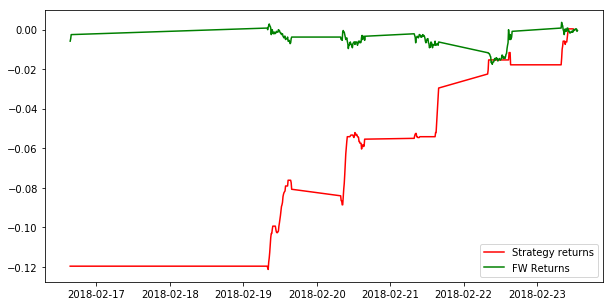

In [38]:
df['FW_returns'] = np.log(df['Last']/df['Last'].shift(1))
Cumulative_FW_returns = np.cumsum(df['FW_returns'])
df['Startegy_returns'] = np.log(df['Last'].shift(6)/df['Last'])*df['Predicted_Signal']
Cumulative_Strategy_returns = np.cumsum(df['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='r',label = 'Strategy returns')
plt.plot(Cumulative_FW_returns, color='g', label = 'FW Returns')
plt.legend()
plt.show()

In [41]:
df.to_excel('C:\\Users\Public\\Documents\\Python Scripts\\Excel files\\FW202030minmodel.xlsx')